#**Introduction To Personal Health Informatics**
#### **Authors:** Sneha Jaikumar and Theodore Wang


![](https://raw.githubusercontent.com/CarolinaDataScience/Workshops2021/main/Personal%20Health%20Informatics/personal-health-informatics-fb.png)




###What is Personal Health Informatics?

Personal Health Informatics combines human-computer interaction and pattern recognition with ideas from behavioral science and social psychology, with the end goal of increasing the usability of health technology, improving access to health services, and creating new user-interfaces to help individuals stay physically/emotionally healthy. 


###How is PHI Data Collected?

A device (smartphone, fitbit, smartwatch) is used by the user to track an activity. Then, ubiquitous sensing and statistical pattern recognition is perfromed on the collected data. The resulting information can be used to develop preventative, interactive health tools.



#### **Step 1:** Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from typing import List
from csv import writer
from datascience import *
import pandas as pd
import numpy as np
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


#### **Step 2:** Find an open source accelerometer dataset


**Accelerometer Data**


*   Raw data that records changes in motion relative to the device in three directions
*   Consists of timestamped x,y,z values, commonly in a .txt file
*   Can be fed into machine learning algorithms to help detect [physical activities](https://www.nytimes.com/interactive/projects/well/2014/03/accelerometers.html), sedentary behaviors, and sleep.

*   Often requires training datasets that have annotated data (i.e., the raw data with the start/stop times of labels of behaviors)


Generally, open source accelerometer datasets are stored in a txt file are messy. It is useful to convert them into a CSV file and format them to follow a template, especially when these datasets need to be run through an ML algorithm

***Common elements to include:***

* A header
* Including additional commentary if a cell is either blank or information is not applicable

The dataset can be found here: [Drive](https://drive.google.com/file/d/1pR38hsgOJIOF-zkVz18xSiSnY4Rt8fAb/view?usp=sharing).

####**Step 3:** Start Cleaning

In [ ]:
#Headers for our dataset
str_headers_list: List[str] = ["HEADER_USER_ID", "HEADER_ACTIVITY", "HEADER_TIMSESTAMP", "HEADER_X-ACCELERATION", "HEADER_Y-ACCELERATION", "HEADER_Z-ACCELERATION", "HEADER_SENSOR_DESCRIPTION","HEADER_PARTICIPANT_DESCRIPTION", "HEADER_SPECIAL_CONSIDERATIONS"]

#Creating a new csv file from our .txt dataset and appending our headers at the top
df1 = pd.read_csv('/content/drive/MyDrive/2021-2022 CADS/Tech Chair Workshop Planning /Workshop 6: Personal Health Informatics/WISDM_ar_v1.1_raw.txt', error_bad_lines=False)
cols = len(df1.axes[1])
for index in range(cols,len(str_headers_list)):
    df1[index] = "\"" + str_headers_list[index].lower() + " is not provided\""
df1.to_csv('Accelerometer_Sensor.CSV', header=str_headers_list, index= False)
pd.read_csv('Accelerometer_Sensor.CSV')

This dataset is over 1 million rows long! We'll be working with the first 150:

In [4]:
#Extract first 150 rows
df_150 = pd.read_csv('Accelerometer_Sensor.CSV').head(150)
df_150


,HEADER_USER_ID,HEADER_ACTIVITY,HEADER_TIMSESTAMP,HEADER_X-ACCELERATION,HEADER_Y-ACCELERATION,HEADER_Z-ACCELERATION,HEADER_SENSOR_DESCRIPTION,HEADER_PARTICIPANT_DESCRIPTION,HEADER_SPECIAL_CONSIDERATIONS
0,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
1,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
2,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
3,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
4,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
...,...,...,...,...,...,...,...,...,...
145,33,Jogging,49121462295000,-6.932757,13.334320,-6.3198414;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
146,33,Jogging,49121572311000,-4.140586,12.871228,-0.84446156;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
147,33,Jogging,49121682296000,3.023717,2.369940,2.0294318;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""
148,33,Jogging,49121792312000,-1.988571,5.979332,0.040861044;,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided"""


#### **Step 4:** Prepare Data for Processing

Some things we have to address...
1. Everything is currently of type string, including the numbers
2. Header_Z-Acceleration Format (';')

In [5]:
#Create a new table with properly formatted accelerations in the x, y, and z directions
accelerometer_table = Table.read_table('Accelerometer_Sensor.CSV')
x_axis_acc = make_array()
y_axis_acc = make_array()
z_axis_acc = make_array()
for num in np.arange(150):
  x_axis_acc = np.append(x_axis_acc, (float)(accelerometer_table.column(0).item(num).split(",")[3]))
  y_axis_acc= np.append(y_axis_acc, (float)(accelerometer_table.column(0).item(num).split(",")[4]))
  #Removes the ';'
  z_axis_acc= np.append(z_axis_acc, (float)(accelerometer_table.column(0).item(num).split(",")[5].replace(';','')))
axes = Table().with_columns('X-AXIS-ACCELERATION', x_axis_acc, 'Y-AXIS-ACCELERATION', y_axis_acc, 'Z-AXIS-ACCELERATION', z_axis_acc)
axes


X-AXIS-ACCELERATION,Y-AXIS-ACCELERATION,Z-AXIS-ACCELERATION
5.01229,11.264,0.953424
4.90332,10.8827,-0.0817221
-0.612916,18.4964,3.02372
-1.18497,12.1085,7.20516
1.37566,-2.49252,-6.51053
-0.612916,10.5694,5.70693
-0.503953,13.9472,7.05534
-8.43099,11.4139,5.13487
0.953424,1.37566,1.64806
-8.19945,19.5724,2.72407


In [6]:
#Reformat our initial CSV file using the columns in our axes table
df_150 = df_150.drop(df_150.columns[[3, 4, 5]], axis=1)
df_150['X-AXIS-ACCELERATION'] = x_axis_acc
df_150['Y-AXIS-ACCELERATION'] = y_axis_acc
df_150['Z-AXIS-ACCELERATION'] = z_axis_acc
df_150.to_csv('Cleaned_Accelerometer_Sensor.CSV')
pd.read_csv('Cleaned_Accelerometer_Sensor.CSV')

,Unnamed: 0,HEADER_USER_ID,HEADER_ACTIVITY,HEADER_TIMSESTAMP,HEADER_SENSOR_DESCRIPTION,HEADER_PARTICIPANT_DESCRIPTION,HEADER_SPECIAL_CONSIDERATIONS,X-AXIS-ACCELERATION,Y-AXIS-ACCELERATION,Z-AXIS-ACCELERATION
0,0,33,Jogging,49106062271000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",5.012288,11.264028,0.953424
1,1,33,Jogging,49106112167000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",4.903325,10.882658,-0.081722
2,2,33,Jogging,49106222305000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",-0.612916,18.496431,3.023717
3,3,33,Jogging,49106332290000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",-1.184970,12.108489,7.205164
4,4,33,Jogging,49106442306000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",1.375655,-2.492524,-6.510526
...,...,...,...,...,...,...,...,...,...,...
145,145,33,Jogging,49121462295000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",-6.932757,13.334320,-6.319841
146,146,33,Jogging,49121572311000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",-4.140586,12.871228,-0.844462
147,147,33,Jogging,49121682296000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",3.023717,2.369940,2.029432
148,148,33,Jogging,49121792312000,"""header_sensor_description is not provided""","""header_participant_description is not provided""","""header_special_considerations is not provided""",-1.988571,5.979332,0.040861


**We have cleaned our dataset!** Our next steps would be checking the dataset's documentation and filling out the description columns. But for now, let's look into the accelerations some more:

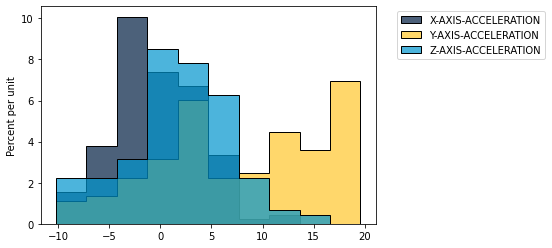

In [7]:
axes.hist('X-AXIS-ACCELERATION', 'Y-AXIS-ACCELERATION','Z-AXIS-ACCELERATION',overlay = True)

**Some things to pay attention to:**
* Acceleration in y-direction is higher than in x or z directions
* Acceleration in x-direction looks to be on the lower end
*Lots of overlap between 0-5 m/s^2

##**That's it! Questions?**##

**Resources:**

[WISDM Dataset](https://www.cis.fordham.edu/wisdm/dataset.php), Fordham University

[Activity Trackers](https://www.nytimes.com/interactive/projects/well/2014/03/accelerometers.html), New York Times
